<a href="https://colab.research.google.com/github/NovrianPratama/Camprodatic/blob/main/CAMPRODATIC_2025_XGBOOST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

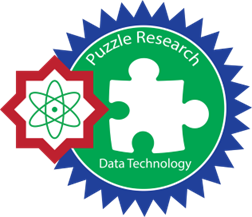

##**CAMPRODATIC MACHINE LEARNING RAMADHAN 2025**

Untuk mengolah data pada Google Colab hal yang pertama kita lakukan ialah memanggil library yang akan kita gunakan dengan kata "import-nama library-as-inisial library". Nah disini library yang akan kita gunakan adalah : "pandas" untuk mengimport file external "numpy" untuk komputasi

In [ ]:
# Import library yang diperlukan
# Untuk manipulasi data
import numpy as np
import pandas as pd

# Untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mengupload file
from google.colab import files
uploaded = files.upload()

Saving heart disease.xlsx to heart disease.xlsx


In [ ]:
# Memuat data dari file yang diupload
data = pd.read_excel('heart disease.xlsx')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# # Menghapus kolom, misalnya kolom 'kolom_yang_dihapus'
# data = data.drop(columns=['age'])

# # Menampilkan 5 baris pertama dari data setelah kolom di-drop
# data.head()

In [ ]:
#mengecek informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#mengecek berapa kolom dan baris data
data.shape

(303, 14)

In [ ]:
#mengecek data duplikat
data.duplicated().sum()

NameError: name 'data' is not defined

In [ ]:
#hapus data duplikat
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

NameError: name 'data' is not defined

In [ ]:
#mengecek kolom yang berisi nilai Nan/kosong
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
#mengecek jumlah kelas sakit jantung dan tidak sakit jantung pada kolom target
data['target'].value_counts()

,count
target,
1,164
0,138


##EXPLORASI DATA

In [ ]:
#melihat distribusi usia
data['age'].value_counts()

,count
age,
58,19
57,17
54,16
59,14
52,13
51,12
62,11
56,11
44,11


In [ ]:
d_list = data.select_dtypes(include = ['object']).columns.tolist()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in d_list:
  le.fit(data[i])
  data[i] = le.transform(data[i])

In [ ]:
print(data.dtypes)  # Pastikan semua kolom sudah bertipe numerik


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [ ]:
# Normalisasi data menggunakan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Pisahkan fitur dan target sebelum normalisasi
X = data.drop('target', axis=1)
y = data['target']

# Terapkan normalisasi pada fitur
X_normalized = scaler.fit_transform(X)

# Ubah hasil normalisasi kembali ke DataFrame
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

# Menampilkan beberapa baris hasil normalisasi
print("\nData setelah normalisasi:")
print(X_normalized.head())


Data setelah normalisasi:
        age  sex        cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.708333  1.0  1.000000  0.481132  0.244292  1.0      0.0  0.603053    0.0   
1  0.166667  1.0  0.666667  0.339623  0.283105  0.0      0.5  0.885496    0.0   
2  0.250000  0.0  0.333333  0.339623  0.178082  0.0      0.0  0.770992    0.0   
3  0.562500  1.0  0.333333  0.245283  0.251142  0.0      0.5  0.816794    0.0   
4  0.583333  0.0  0.000000  0.245283  0.520548  0.0      0.5  0.702290    1.0   

    oldpeak  slope   ca      thal  
0  0.370968    0.0  0.0  0.333333  
1  0.564516    0.0  0.0  0.666667  
2  0.225806    1.0  0.0  0.666667  
3  0.129032    1.0  0.0  0.666667  
4  0.096774    1.0  0.0  0.666667  


In [ ]:
data['target'].value_counts()

,count
target,
1,164
0,138


In [ ]:
# Pisahkan fitur dan target
X = data.drop('target', axis=1) # berisi fitur
y = data['target'] #berisi label atau target

In [ ]:
from sklearn.model_selection import train_test_split

# Memisahkan data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Menampilkan jumlah data untuk X_train, X_test, y_train, dan y_test
print("Jumlah data pelatihan (X_train):", X_train.shape[0])
print("Jumlah data pengujian (X_test):", X_test.shape[0])
print("Jumlah label pelatihan (y_train):", y_train.shape[0])
print("Jumlah label pengujian (y_test):", y_test.shape[0])


Jumlah data pelatihan (X_train): 211
Jumlah data pengujian (X_test): 91
Jumlah label pelatihan (y_train): 211
Jumlah label pengujian (y_test): 91


##XGBOOST

Best parameters found:  {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.5}
Best score:  0.8436323366555925
Accuracy: 0.8571
Precision: 0.8462
Recall: 0.8980
AUC: 0.9198


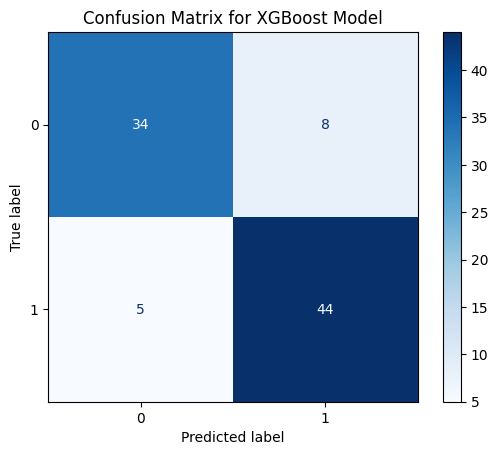

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        42
           1       0.85      0.90      0.87        49

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.86        91
weighted avg       0.86      0.86      0.86        91



In [ ]:
# Menggunakan XGBoost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score

# Definisikan parameter untuk GridSearchCV
params = {
    'n_estimators': [100, 200],       # Jumlah pohon keputusan dalam model (semakin banyak, semakin kompleks)
    'learning_rate': [0.01, 0.05],     # Seberapa besar langkah pembelajaran untuk mengupdate model (nilai kecil lebih stabil)
    'max_depth': [6],               # Kedalaman maksimum setiap pohon (lebih dalam = lebih kompleks)
    'subsample': [0.5, 0.8],           # Persentase sampel yang digunakan untuk setiap pohon (menghindari overfitting)
    'colsample_bytree': [0.8, 1.0],    # Proporsi fitur yang dipilih untuk setiap pohon (mengurangi korelasi antar fitur)
    'gamma': [0.1, 0.2]                # Regularisasi: semakin tinggi nilainya, semakin sulit pohon baru dibuat (menghindari overfitting)

}

# Inisialisasi model XGBoost
xgb_model = XGBClassifier()

# Inisialisasi GridSearchCV
xgb_hyper_model = GridSearchCV(xgb_model, param_grid=params)

# Fit model
xgb_hyper_model.fit(X_train, y_train)

# Menampilkan hasil
print("Best parameters found: ", xgb_hyper_model.best_params_)
print("Best score: ", xgb_hyper_model.best_score_)

# Melakukan prediksi pada data test
y_pred = xgb_hyper_model.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

# Menampilkan hasil evaluasi
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'AUC: {auc:.4f}')

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix dengan visualisasi
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_hyper_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for XGBoost Model")
plt.show()

# Menampilkan classification report
print(classification_report(y_test, y_pred))


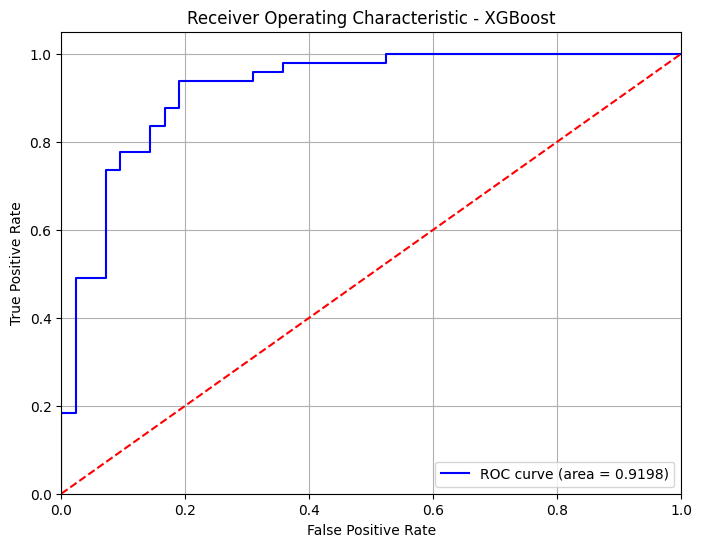

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report

# Melakukan prediksi probabilitas pada data test
y_prob = xgb_hyper_model.predict_proba(X_test)[:, 1]  # Ambil probabilitas untuk kelas positif

# Menghitung nilai fpr (false positive rate) dan tpr (true positive rate)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Menghitung AUC
auc = roc_auc_score(y_test, y_prob)

# Memvisualisasikan kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.4f})'.format(auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Garis diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - XGBoost')
plt.legend(loc='lower right')
plt.grid()
plt.show()